# Analysis of TED Talks using NLP
### Final Project Submission for COMP 4447 by Yashwant Jankay

For my COMP 4447 Final Project, I will be using Natural Language Processing to analyze and interpret the contents of TED talks. My analysis will include understanding why stopwords are crucial for preprocessing, visualizing the word distributions including the most frequently spoken words using word clouds, TFIDF (Term Frequency Inverse Document Frequency), n-grams

## Loading the Data and converting it into a Pandas Dataframe.

First, let's load the datasets. Our datasets are transcripts of TED-Ed talks stored in markdown files. Importing libraries..

In [92]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
from markdown import markdown
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import glob, os
from os import path
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from nltk.corpus import stopwords
import re
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation,NMF

stop = set(stopwords.words('english'))

%matplotlib inline

In [5]:
lst=[]
os.chdir("C:/Users/Yash/Desktop/Data Science @ Denver/Final Projects/COMP 4447/TOOLS1-FINAL_PROJECT/cleaned_teded_data/Titles_starting_0_to_9/")
for file in glob.glob("*.md"):
    lst.append(file)
    
master=[]
for fname in lst:
    with open(fname, encoding="utf8") as f:
        m = f.read()
        html = markdown(m)
        text = ''.join(BeautifulSoup(html, "lxml").findAll(text=True))
        text = text.replace('\n',' ')
        master.append(text)
lst1=[]
os.chdir("C:/Users/Yash/Desktop/Data Science @ Denver/Final Projects/COMP 4447/TOOLS1-FINAL_PROJECT/cleaned_teded_data/Titles_starting_A_to_O/")
for file in glob.glob("*.md"):
    lst1.append(file)
    
master1=[]
for fname in lst1:
    with open(fname, encoding="utf8") as f:
        m = f.read()
        html = markdown(m)
        text = ''.join(BeautifulSoup(html, "lxml").findAll(text=True))
        text = text.replace('\n',' ')
        master1.append(text)

lst2=[]
os.chdir("C:/Users/Yash/Desktop/Data Science @ Denver/Final Projects/COMP 4447/TOOLS1-FINAL_PROJECT/cleaned_teded_data/Titles_starting_P_to_Z/")
for file in glob.glob("*.md"):
    lst2.append(file)
    
master2=[]
for fname in lst2:
    with open(fname, encoding="utf8") as f:
        m = f.read()
        html = markdown(m)
        text = ''.join(BeautifulSoup(html, "lxml").findAll(text=True))
        text = text.replace('\n',' ')
        master2.append(text)

Perform a sanity check and see if there is a match between the total number of markdowns in the folders and the total number of transcripts successfully read.

In [6]:
master_lst = lst + lst1 + lst2

In [7]:
len(master_lst)

1366

In [8]:
final_master = master + master1 + master2

In [9]:
len(final_master)

1366

Save this into a Pandas Dataframe.

In [20]:
ted_ed = pd.DataFrame(data=final_master)
ted_ed['Title'] = master_lst
ted_ed.columns=['Content','Title']

ted_ed.head()

,Content,Title
0,there's currently over a thousand TEDTalks on ...,1000_TEDTalks_6_words_Sebastian_Wernicke.md
1,so today I'm gonna tell you about some people ...,3_stories_of_local_eco_entrepreneurship_Majora...
2,imagine a big explosion as you climb through 3...,3_things_I_learned_while_my_plane_crashed_Ric_...
3,Translator: Jennifer Cody Reviewer: Jessica Ru...,3_tips_to_boost_your_confidence_TED_Ed.md
4,so what I want to try to do is tell a quick st...,404_the_story_of_a_page_not_found_Renny_Gleeso...


We have 1366 TED-Ed transcripts in our dataset. Let's do the same with TED talks. 

In [22]:
lst=[]
os.chdir("C:/Users/Yash/Desktop/Data Science @ Denver/Final Projects/COMP 4447/TOOLS1-FINAL_PROJECT/cleaned_ted_data/Titles_starting_0_to_9/")
for file in glob.glob("*.md"):
    lst.append(file)

master=[]
for fname in lst:
    with open(fname, encoding="utf8") as f:
        m = f.read()
        html = markdown(m)
        text = ''.join(BeautifulSoup(html, "lxml").findAll(text=True))
        text = text.replace('\n',' ')
        master.append(text)
        
lst1=[]
os.chdir("C:/Users/Yash/Desktop/Data Science @ Denver/Final Projects/COMP 4447/TOOLS1-FINAL_PROJECT/cleaned_ted_data/Titles_starting_A_to_O/")
for file in glob.glob("*.md"):
    lst1.append(file)
    
master1=[]
for fname in lst1:
    with open(fname, encoding="utf8") as f:
        m = f.read()
        html = markdown(m)
        text = ''.join(BeautifulSoup(html, "lxml").findAll(text=True))
        text = text.replace('\n',' ')
        master1.append(text)

lst2=[]
os.chdir("C:/Users/Yash/Desktop/Data Science @ Denver/Final Projects/COMP 4447/TOOLS1-FINAL_PROJECT/cleaned_ted_data/Titles_starting_P_to_Z/")
for file in glob.glob("*.md"):
    lst2.append(file)
    
master2=[]
for fname in lst2:
    with open(fname, encoding="utf8") as f:
        m = f.read()
        html = markdown(m)
        text = ''.join(BeautifulSoup(html, "lxml").findAll(text=True))
        text = text.replace('\n',' ')
        master2.append(text)

In [23]:
master_lst = lst + lst1 + lst2
len(master_lst)

2498

In [24]:
final_master = master + master1 + master2
len(final_master)

2498

In [25]:
ted = pd.DataFrame(data=final_master)
ted['Title'] = master_lst
ted.columns=['Content','Title']

ted.head()

,Content,Title
0,"You've heard of your I.Q., your general intell...",10_myths_about_psychology_debunked_Ben_Ambridg...
1,Alright. I'm going to show you a couple of ima...,10_things_you_didn't_know_about_orgasm_Mary_Ro...
2,Translator: Joseph Geni Reviewer: Morton Bast ...,10_top_time_saving_tech_tips_David_Pogue.md
3,"All right, I want to see a show of hands: how ...",10_ways_to_have_a_better_conversation_Celeste_...
4,It is a thrill to be here at a conference that...,12_sustainable_design_ideas_from_nature_Janine...


In [26]:
ted_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 0 to 1365
Data columns (total 2 columns):
Content    1366 non-null object
Title      1366 non-null object
dtypes: object(2)
memory usage: 21.4+ KB


In [27]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 2 columns):
Content    2498 non-null object
Title      2498 non-null object
dtypes: object(2)
memory usage: 39.1+ KB


## Word Clouds

Let's generate the Word Clouds for both ted_ed and ted dataframes without any text preprocessing and examine the result.

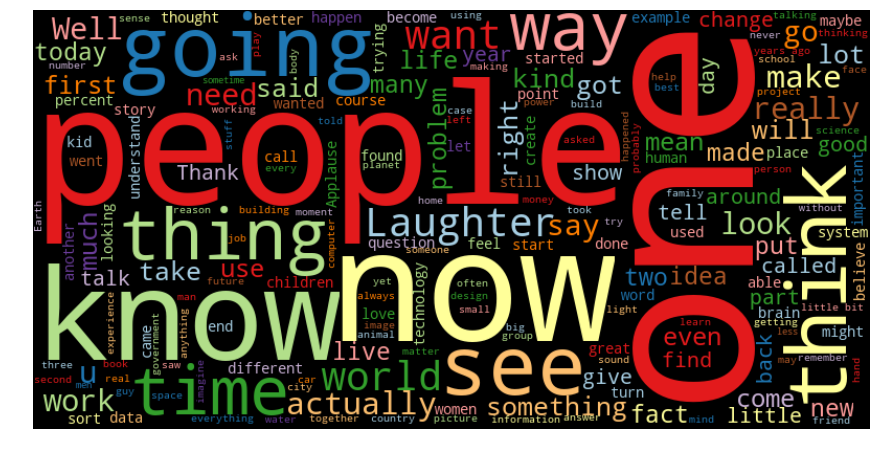

In [29]:
wordcloud = WordCloud(relative_scaling=.4,
                          background_color='black',
                          width=800,
                          height=400,colormap='Paired')


wordcloud = wordcloud.generate(''.join(list(ted.Content)))

wordcloud.to_file("C:/Users/Yash/Desktop/Data Science @ Denver/Final Projects/COMP 4447/TOOLS1-FINAL_PROJECT/ted_cloud_no_stopwords.png")
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

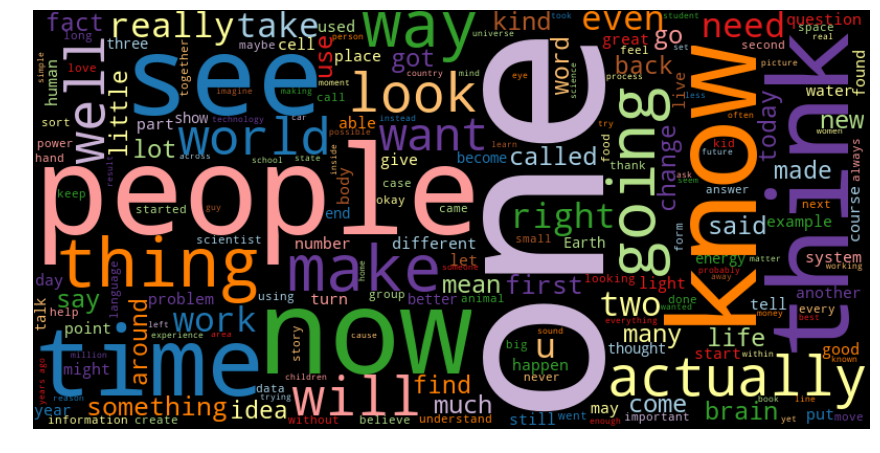

In [30]:
wordcloud = WordCloud(relative_scaling=.4,
                          background_color='black',
                          width=800,
                          height=400,colormap='Paired')


wordcloud = wordcloud.generate(''.join(list(ted_ed.Content)))

wordcloud.to_file("C:/Users/Yash/Desktop/Data Science @ Denver/Final Projects/COMP 4447/TOOLS1-FINAL_PROJECT/ted_ed_cloud_no_stopwords.png")
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

One of the bigger takeaways is that the word "time" appears more in TED-Ed talks as compared to TED talks. 

Let's apply a stopwords filter using stopwords=STOPWORDS argument in the WordCloud function.

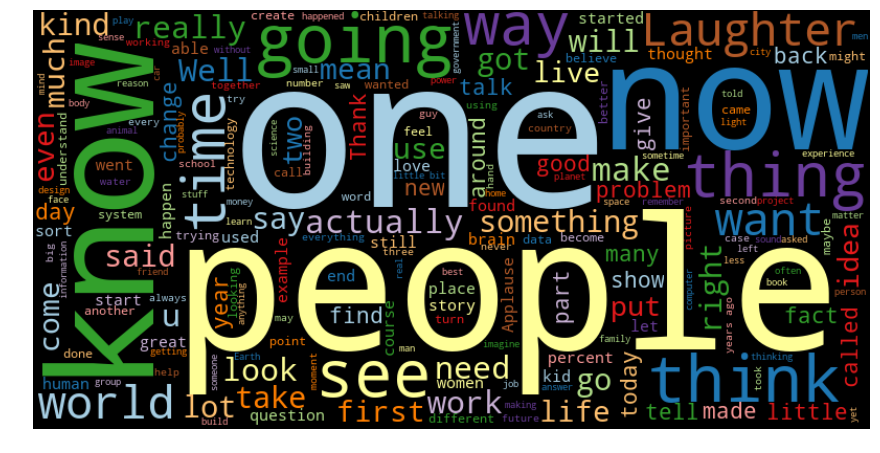

In [31]:
wordcloud = WordCloud(stopwords=STOPWORDS, relative_scaling=.4,
                          background_color='black',
                          width=800,
                          height=400,colormap='Paired')


wordcloud = wordcloud.generate(''.join(list(ted.Content)))

wordcloud.to_file("C:/Users/Yash/Desktop/Data Science @ Denver/Final Projects/COMP 4447/TOOLS1-FINAL_PROJECT/ted_cloud.png")
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

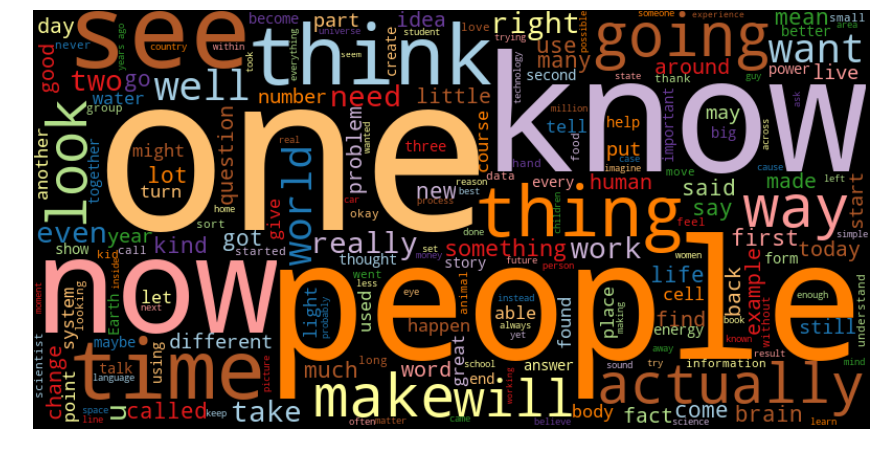

In [32]:
wordcloud = WordCloud(stopwords=STOPWORDS, relative_scaling=.4,
                          background_color='black',
                          width=800,
                          height=400,colormap='Paired')


wordcloud = wordcloud.generate(''.join(list(ted_ed.Content)))

wordcloud.to_file("C:/Users/Yash/Desktop/Data Science @ Denver/Final Projects/COMP 4447/TOOLS1-FINAL_PROJECT/ted_ed_cloud.png")
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

There appears to be no massive change in the body of the Word Clouds. Let's save our Dataframes into pickles so that we can invoke them easily.

In [35]:
ted_ed.to_pickle("C:/Users/Yash/Desktop/Data Science @ Denver/Final Projects/COMP 4447/TOOLS1-FINAL_PROJECT/ted_ed.pkl")

In [36]:
ted.to_pickle("C:/Users/Yash/Desktop/Data Science @ Denver/Final Projects/COMP 4447/TOOLS1-FINAL_PROJECT/ted.pkl")

## N-grams

We will now apply basic text preprocessing to our "Content" column in both of our Dataframes ted and ted_ed. After preprocessing our "Content" coulmn, we will obtain cleaned text transcripts which we will then obtain n-grams from.

In [73]:
#Text cleaning and preprocessing function
def clean_doc(doc):
    doc = re.sub('[^A-Za-z .-]+', ' ', doc)
    doc = ' '.join(doc.split())
    doc = ' '.join([i.lower() for i in doc.split() if i.lower() not in stop])
    return doc

Let's analyze TED transcripts first. We will be using RegexpTokenizer that only picks up words and not punctuations. Our first look will be at Trigrams.

In [53]:
tokenizer = RegexpTokenizer(r'\w+')

In [74]:
all_text = " ".join(list(ted.Content))
clean_all_text = clean_doc(all_text)

In [75]:
tokens = tokenizer.tokenize(clean_all_text)

In [76]:
trigrams = ngrams(tokens,3)

In [77]:
Counter(trigrams).most_common(15)

[(('thank', 'you', 'applause'), 1607),
 (('thank', 'much', 'applause'), 547),
 (('applause', 'thank', 'you'), 327),
 (('reviewer', 'morton', 'bast'), 249),
 (('translator', 'joseph', 'geni'), 235),
 (('joseph', 'geni', 'reviewer'), 235),
 (('new', 'york', 'city'), 234),
 (('geni', 'reviewer', 'morton'), 202),
 (('applause', 'translator', 'joseph'), 202),
 (('you', 'applause', 'translator'), 184),
 (('thank', 'you', 'thank'), 140),
 (('you', 'applause', 'thank'), 129),
 (('new', 'york', 'times'), 121),
 (('you', 'thank', 'you'), 119),
 (('every', 'single', 'day'), 108)]

It appears that "Applause" needs to be treated as a stop word because it simply states when the audience is applauding.

In [84]:
stop.add("applause")

In [85]:
all_text = " ".join(list(ted.Content))
clean_all_text = clean_doc(all_text)

tokens = tokenizer.tokenize(clean_all_text)

trigrams = ngrams(tokens,3)

In [86]:
Counter(trigrams).most_common(15)

[(('thank', 'you', 'thank'), 272),
 (('reviewer', 'morton', 'bast'), 249),
 (('translator', 'joseph', 'geni'), 235),
 (('joseph', 'geni', 'reviewer'), 235),
 (('new', 'york', 'city'), 234),
 (('you', 'thank', 'you'), 220),
 (('thank', 'you', 'translator'), 206),
 (('geni', 'reviewer', 'morton'), 202),
 (('you', 'translator', 'joseph'), 138),
 (('new', 'york', 'times'), 121),
 (('every', 'single', 'day'), 108),
 (('two', 'years', 'ago'), 104),
 (('people', 'around', 'world'), 100),
 (('million', 'years', 'ago'), 99),
 (('one', 'two', 'three'), 97)]

These results are more insightful than the previous ones. We can see mentions of the reviewer and translator Morton Bast and Joseph Geni respectively. Let's take a look at Bigrams as well.

In [87]:
bigrams = ngrams(tokens,2)

In [88]:
Counter(bigrams).most_common(15)

[(('thank', 'you'), 2228),
 (('years', 'ago'), 2012),
 (('little', 'bit'), 1577),
 (('united', 'states'), 1120),
 (('thank', 'much'), 936),
 (('around', 'world'), 934),
 (('new', 'york'), 891),
 (('first', 'time'), 756),
 (('things', 'like'), 752),
 (('every', 'day'), 714),
 (('look', 'like'), 695),
 (('looks', 'like'), 689),
 (('like', 'this'), 680),
 (('many', 'people'), 671),
 (('u', 's'), 662)]

Trigrams show us that there is a high number of mentions of "New York Times" as well as "Million years ago". Bigrams show us that there are a lot of mentions of "New York", "Many people" and "first time".

Since TED talks are tailored to provide inspiration and motivation, it makes comeplete sense that these Bigrams are persistent in frequent occurance.

What if we check out Quadgrams?

In [90]:
quadgrams = ngrams(tokens,4)

In [91]:
Counter(quadgrams).most_common(15)

[(('translator', 'joseph', 'geni', 'reviewer'), 235),
 (('joseph', 'geni', 'reviewer', 'morton'), 202),
 (('geni', 'reviewer', 'morton', 'bast'), 202),
 (('thank', 'you', 'thank', 'you'), 201),
 (('you', 'translator', 'joseph', 'geni'), 138),
 (('thank', 'you', 'translator', 'joseph'), 137),
 (('you', 'thank', 'you', 'thank'), 74),
 (('thank', 'much', 'thank', 'you'), 70),
 (('thank', 'you', 'chris', 'anderson'), 62),
 (('da', 'da', 'da', 'da'), 51),
 (('thank', 'you', 'thank', 'much'), 49),
 (('much', 'translator', 'joseph', 'geni'), 47),
 (('reviewer', 'thu', 'huong', 'ha'), 44),
 (('finger', 'finger', 'finger', 'finger'), 43),
 (('one', 'two', 'three', 'four'), 42)]

Interesting to see "finger finger finger finger" has 43 occurances.

## Topic Modeling with TFIDF and NMF

I'm going to take this final project just a step further and perform topic modeling on our dataset. Topic Modeling is the unsupervized method of breaking down raw text into groups - which we will define as topics based on it's contents.

We will create a new column that contains the cleaned text after the removal of stopwords and numeric characters

In [94]:
ted["clean_Content"] = ted.Content.apply(lambda x:clean_doc(x))

First, we will initialize a TFIDF Vectorizer instance with 4000 as max_features hyperparameter and push our "clean_Content" column through it.

In [95]:
tfidf = TfidfVectorizer(max_features=4000)

X_tfidf = tfidf.fit_transform(ted.clean_Content)

In [96]:
X_tfidf.shape

(2498, 4000)

Our TFIDF transformed matrix is 2498 TED talks long and 4000 features (words) wide. Let's print some featured words.

In [100]:
tfidf.get_feature_names()[::100]

['abilities',
 'algorithms',
 'article',
 'become',
 'brains',
 'category',
 'clients',
 'conflicts',
 'crimes',
 'desert',
 'dollars',
 'electricity',
 'everything',
 'families',
 'flows',
 'gases',
 'growing',
 'hole',
 'independent',
 'islands',
 'lay',
 'love',
 'medium',
 'movement',
 'nowadays',
 'outcomes',
 'personal',
 'poster',
 'prosperity',
 'received',
 'returned',
 'schools',
 'shock',
 'solutions',
 'steve',
 'sustainability',
 'therefore',
 'trauma',
 'user',
 'weeks']

Next, we will apply a dimensionality reduction technique in order to draw topics out of these transcripts. I will be using Non-Negative Matrix Factorization (NMF) as my primary method.

I will try defining 20 topics to begin with.

In [106]:
no_topics = 20

nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')

X_nmf = nmf.fit(X_tfidf)

Now that we our fitted NMF, we will define a function to extract and print out the topics.

In [104]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [107]:
no_top_words = 10

display_topics(X_nmf, tfidf.get_feature_names(), no_top_words)

Topic 0:
like one people going think really know get things see
Topic 1:
said life family people mother father man would children story
Topic 2:
sound sounds noise listening voice hear hearing listen ears silence
Topic 3:
music applause play ends musical song piece playing piano musicians
Topic 4:
cells cell dna stem tissue genome body bacteria bone organs
Topic 5:
water ocean fish sea species animals climate carbon planet ice
Topic 6:
people countries world country china government global percent money economic
Topic 7:
design building architecture designers buildings designed project architects materials designing
Topic 8:
women men girls woman sex gender female pm male boys
Topic 9:
kids school education children teachers students schools learning teacher classroom
Topic 10:
brain neurons brains cortex neuron arm neuroscience activity memory disorders
Topic 11:
universe stars galaxies light galaxy telescope planets space black see
Topic 12:
data information web map numbers computer 

**The results look promising!**

We can notice that **Topic 11** talks about universe, stars and galaxies, **Topic 14** is about robotics, **Topic 2** is about listening and sound while **Topic 3** is regarding songs and music.

## Next Steps

My next step would be building a recommendation engine that is capable of detecting the topic a TED talk belongs to and recommends similar TED talks based on the same topic.